# Machine Learning for data engineering 

Importation of the dataset :

Chargement des images organiques...
Chargement des images recyclables...
Nombre total d'images : 2513
Dimensions des images : (128, 128, 3)
Nombre d'étiquettes organiques : 1401
Nombre d'étiquettes recyclables : 1112
Taille de l'ensemble d'entraînement : 2010
Taille de l'ensemble de test : 503
Visualisation de quelques exemples...


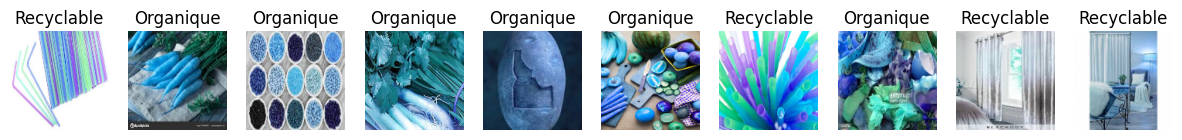

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


path_organique = r'Kaggle-Waste-Classification-Dataset\DATASET\DATASET\TEST\O'
path_recyclable = r'Kaggle-Waste-Classification-Dataset\DATASET\DATASET\TEST\R'


image_size = (128, 128)  # Taille standard pour toutes les images
data = []  # Liste pour stocker les données
labels = []  # Liste pour stocker les étiquettes (0 = Organique, 1 = Recyclable)

# Fonction pour charger les images
def load_images_from_folder(folder_path, label):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Charger l'image
            img = cv2.imread(img_path)
            if img is not None:
                # Redimensionner l'image
                img = cv2.resize(img, image_size)
                # Ajouter aux données
                data.append(img)
                labels.append(label)

# Charger les images des deux dossiers
print("Chargement des images organiques...")
load_images_from_folder(path_organique, label=0)  # Organique = 0
print("Chargement des images recyclables...")
load_images_from_folder(path_recyclable, label=1)  # Recyclable = 1

# Convertir en tableaux numpy
data = np.array(data)
labels = np.array(labels)

# Normaliser les images (valeurs entre 0 et 1)
data = data / 255.0

# Afficher des informations sur les données
print(f"Nombre total d'images : {len(data)}")
print(f"Dimensions des images : {data.shape[1:]}")
print(f"Nombre d'étiquettes organiques : {np.sum(labels == 0)}")
print(f"Nombre d'étiquettes recyclables : {np.sum(labels == 1)}")

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Taille de l'ensemble d'entraînement : {len(X_train)}")
print(f"Taille de l'ensemble de test : {len(X_test)}")

# Visualisation de quelques images avec leurs étiquettes
def visualize_images(images, labels, num=10):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        idx = np.random.randint(0, len(images))
        plt.subplot(1, num, i + 1)
        plt.imshow(images[idx])
        plt.title("Recyclable" if labels[idx] == 1 else "Organique")
        plt.axis("off")
    plt.show()

print("Visualisation de quelques exemples...")
visualize_images(X_train, y_train)


In [20]:
import pandas as pd
import ast
# Chemin vers le fichier CSV
ademe_file = r'ADEME\longue-vie-aux-objets-acteurs-de-leconomie-circulaire.csv'

# Charger le dataset
ademe_data = pd.read_csv(ademe_file)

# Afficher les premières lignes pour explorer le contenu
print("Aperçu des données ADEME :")
print(ademe_data.head())

# Vérifier les colonnes
print("\nColonnes disponibles :")
print(ademe_data.columns)

# Nettoyage des données
# Supprimer les colonnes inutiles (ajuster selon vos besoins)

# Extraire les colonnes "action" et "sous_categories"
def extract_action_and_subcategories(proposition):
    try:
        proposition_list = ast.literal_eval(proposition)
        actions = [item['action'] for item in proposition_list]
        subcategories = [", ".join(item['sous_categories']) for item in proposition_list]
        return "; ".join(actions), "; ".join(subcategories)
    except (ValueError, TypeError, KeyError):
        return None, None

ademe_data['action'], ademe_data['sous_categories'] = zip(*ademe_data['Propositions de services'].apply(extract_action_and_subcategories))

# Afficher un aperçu des données enrichies
print("Aperçu des données après extraction :")
print(ademe_data[['Nom', 'action', 'sous_categories']].head())


ademe_data_cleaned = ademe_data.drop(columns=['Identifiant', 'Paternité', 'SIREN', 'SIRET', 
                                              'Téléphone', 'Complément d\'adresse', 'Date de dernière modification'])

# Supprimer les lignes avec des valeurs manquantes importantes
ademe_data_cleaned = ademe_data_cleaned.dropna(subset=['Nom', 'Code postal', 'Ville', 'latitude', 'longitude'])






Aperçu des données ADEME :
              Identifiant                            Paternité  \
0  oZEfLnWj7giLRBxHdqoyYJ  Longue Vie Aux Objets|ADEME|SCRELEC   
1  oZELhFxXPdEBPaKoDf2PvJ          Longue Vie Aux Objets|ADEME   
2  oZEJU6bvg7ZhJUaBRGLjaz  Longue Vie Aux Objets|ADEME|ALIAPUR   
3  oZEEAvwakjHrNxFM944VSt    Longue Vie Aux Objets|ADEME|CITEO   
4  oZDpWqDMKH6fxcPLQJGxtG  Longue Vie Aux Objets|ADEME|ALIAPUR   

                                       Nom Nom commercial        SIREN  \
0                              Lidl - SOCX           Lidl          NaN   
1                  L'Atelier Bar A Couture            NaN          NaN   
2                         AD VAS PERPIGNAN            NaN          NaN   
3  C.C. DU BRIANCONNAIS: Point de collecte            NaN  240500439.0   
4      RENAULT SAVENAY AUTOMOBILES SAVENAY            NaN          NaN   

            SIRET Description Type d'acteur Site web   Téléphone  ...  \
0             NaN         NaN      commerce      NaN      

In [21]:
# Afficher un résumé des données nettoyées
print("\nRésumé des données nettoyées :")
print(ademe_data_cleaned.info())

# Enregistrer les données nettoyées pour une utilisation ultérieure
ademe_data_cleaned.to_csv(r'ADEME\ademe_cleaned.csv', index=False)

# Visualisation rapide des données par service proposé
service_counts = ademe_data_cleaned['Type de services'].value_counts()
print("\nNombre d'acteurs par type de service :")
print(service_counts)

# Exemple : Filtrer les acteurs proposant un service spécifique
service_filter = "structure_de_collecte"
filtered_data = ademe_data_cleaned[ademe_data_cleaned['Type de services'] == service_filter]
print(f"\nActeurs proposant le service '{service_filter}' :")
print(filtered_data[['Nom', 'Adresse', 'Ville', 'Code postal', 'latitude', 'longitude']])



Résumé des données nettoyées :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 313335 entries, 0 to 317118
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Nom                                313335 non-null  object 
 1   Nom commercial                     48775 non-null   object 
 2   Description                        2060 non-null    object 
 3   Type d'acteur                      313335 non-null  object 
 4   Site web                           12909 non-null   object 
 5   Adresse                            312031 non-null  object 
 6   Code postal                        313335 non-null  object 
 7   Ville                              313335 non-null  object 
 8   latitude                           313335 non-null  float64
 9   longitude                          313335 non-null  float64
 10  Qualités et labels                 11509 non-null   object 
 11  Public 

In [3]:
import pandas as pd

# Chemin vers le fichier CSV
data_sud_file = r'Data Sud\tonnage-des-dechets-collectes-en-2020-2021.csv'

# Charger le dataset
data_sud = pd.read_csv(data_sud_file, sep=';')

# Afficher les premières lignes pour explorer le contenu
print("Aperçu des données Data Sud :")
print(data_sud.head())

# Vérifier les colonnes
print("\nColonnes disponibles :")
print(data_sud.columns)

# Nettoyage des données
# Supprimer les colonnes inutiles ou non pertinentes (ajustez selon vos besoins)
data_sud_cleaned = data_sud.drop(columns=['geo_shape_commune'], errors='ignore')

# Supprimer les lignes avec des valeurs manquantes critiques
data_sud_cleaned = data_sud_cleaned.dropna(subset=['nom_commune', 'insee', 'omr_en_tonnes', 'geo_point_2d'])

# Extraire latitude et longitude depuis la colonne `geo_point_2d`
data_sud_cleaned[['latitude', 'longitude']] = data_sud_cleaned['geo_point_2d'].str.split(',', expand=True)
data_sud_cleaned['latitude'] = data_sud_cleaned['latitude'].astype(float)
data_sud_cleaned['longitude'] = data_sud_cleaned['longitude'].astype(float)

# Supprimer la colonne `geo_point_2d` après extraction
data_sud_cleaned = data_sud_cleaned.drop(columns=['geo_point_2d'], errors='ignore')

# Résumé des données nettoyées
print("\nRésumé des données nettoyées :")
print(data_sud_cleaned.info())

# Visualisation rapide des données par type de déchets
print("\nStatistiques des quantités de déchets collectés (moyenne par type) :")
print(data_sud_cleaned[['omr_en_tonnes', 'cs_en_tonnes', 'verre_seul_en_tonnes']].mean())

# Exemple : Filtrer les communes avec un tonnage de déchets organiques (OMR) élevé
omr_threshold = 10000
high_omr_communes = data_sud_cleaned[data_sud_cleaned['omr_en_tonnes'] > omr_threshold]
print(f"\nCommunes avec plus de {omr_threshold} tonnes de déchets organiques :")
print(high_omr_communes[['nom_commune', 'omr_en_tonnes', 'latitude', 'longitude']])

# Sauvegarder les données nettoyées pour usage ultérieur
data_sud_cleaned.to_csv(r'Data Sud\data_sud_cleaned.csv', index=False)


Aperçu des données Data Sud :
   annee    insee                    nom_commune  omr_en_tonnes  \
0   2021  13206.0   Marseille 6e  Arrondissement        18680.0   
1   2021  13216.0  Marseille 16e  Arrondissement         7786.0   
2   2021  13001.0                Aix-en-Provence        48152.0   
3   2021  13002.0                        Allauch         7470.0   
4   2021  13014.0                  Berre-l'Étang         5318.0   

   omr_en_kg_hab_an  cs_en_tonnes  cs_en_kg_hab_an  verre_seul_en_tonnes  \
0        442.224379        1969.0        46.613480                 994.0   
1        483.452344         436.0        27.072338                 182.0   
2        336.499018        7683.0        53.690853                3042.0   
3        358.101630         961.0        46.069032                 333.0   
4        393.343195         542.0        40.088757                 168.0   

   verre_seul_en_kg_hab_an                                  geo_shape_commune  \
0                23.531640  {

Création d'un modèle CNN

CNN chargement des données

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Chemins vers les dossiers d'images
path_organique = r'Kaggle-Waste-Classification-Dataset\DATASET\DATASET\TEST\O'
path_recyclable = r'Kaggle-Waste-Classification-Dataset\DATASET\DATASET\TEST\R'

# Paramètres
image_size = (128, 128)  # Taille standard pour toutes les images
data = []  # Liste pour stocker les images
labels = []  # Liste pour stocker les étiquettes (0 = Organique, 1 = Recyclable)

# Fonction pour charger les images
def load_images_from_folder(folder_path, label):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)  # Redimensionner
                data.append(img)
                labels.append(label)

# Charger les images
print("Chargement des images...")
load_images_from_folder(path_organique, label=0)  # Organique = 0
load_images_from_folder(path_recyclable, label=1)  # Recyclable = 1

# Convertir en tableaux numpy
data = np.array(data)
labels = np.array(labels)

# Normaliser les images
data = data / 255.0

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Sauvegarder les données pour utilisation ultérieure
np.save('kaggle_images.npy', data)
np.save('kaggle_labels.npy', labels)
print("Données sauvegardées sous 'kaggle_images.npy' et 'kaggle_labels.npy'.")


Chargement des images...
Données sauvegardées sous 'kaggle_images.npy' et 'kaggle_labels.npy'.


construction model CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Fonction pour créer un modèle CNN
def create_cnn_model(activation='relu'):
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=X_train.shape[1:]),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation=activation),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Sortie binaire : 0 ou 1
    ])
    return model


training and model evaluation

In [7]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Configuration de l'optimiseur
learning_rate = 0.001
optimizer = SGD(learning_rate=learning_rate, momentum=0.9)

# Créer le modèle
model = create_cnn_model(activation='relu')

# Compiler le modèle
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Configurer early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entraîner le modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Évaluer le modèle
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


Epoch 1/20
63/63 [==============================] - 20s 304ms/step - loss: 0.6381 - accuracy: 0.6721 - val_loss: 0.5339 - val_accuracy: 0.8052
Epoch 2/20
63/63 [==============================] - 19s 297ms/step - loss: 0.4444 - accuracy: 0.8194 - val_loss: 0.4093 - val_accuracy: 0.8151
Epoch 3/20
63/63 [==============================] - 19s 303ms/step - loss: 0.3901 - accuracy: 0.8473 - val_loss: 0.3801 - val_accuracy: 0.8231
Epoch 4/20
63/63 [==============================] - 19s 306ms/step - loss: 0.3643 - accuracy: 0.8597 - val_loss: 0.3542 - val_accuracy: 0.8429
Epoch 5/20
63/63 [==============================] - 19s 298ms/step - loss: 0.3374 - accuracy: 0.8682 - val_loss: 0.3451 - val_accuracy: 0.8529
Epoch 6/20
63/63 [==============================] - 19s 298ms/step - loss: 0.3245 - accuracy: 0.8736 - val_loss: 0.3420 - val_accuracy: 0.8569
Epoch 7/20
63/63 [==============================] - 20s 315ms/step - loss: 0.3163 - accuracy: 0.8746 - val_loss: 0.3229 - val_accuracy: 0.8648

Save and configuration Test

In [8]:
# Tester plusieurs configurations
activations = ['relu', 'leaky_relu']
learning_rates = [0.01, 0.001]

results = {}
for activation in activations:
    for lr in learning_rates:
        print(f"\nTest avec activation={activation} et learning_rate={lr}")
        
        # Configurer l'optimiseur
        optimizer = SGD(learning_rate=lr, momentum=0.9)
        
        # Créer et compiler le modèle
        model = create_cnn_model(activation=activation)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        # Entraîner le modèle
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=20,
            batch_size=32,
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Évaluer le modèle
        val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
        results[f"activation={activation}, lr={lr}"] = val_acc

# Résultats des tests
best_config = max(results, key=results.get)
print(f"\nMeilleure configuration : {best_config} avec précision {results[best_config]:.2f}")

# Sauvegarder le meilleur modèle
model.save('best_cnn_model.h5')
print("Meilleur modèle sauvegardé sous 'best_cnn_model.h5'.")



Test avec activation=relu et learning_rate=0.01
Epoch 1/20
63/63 [==============================] - 20s 306ms/step - loss: 0.5418 - accuracy: 0.7348 - val_loss: 0.5792 - val_accuracy: 0.7475
Epoch 2/20
63/63 [==============================] - 20s 316ms/step - loss: 0.3847 - accuracy: 0.8438 - val_loss: 0.3956 - val_accuracy: 0.8370
Epoch 3/20
63/63 [==============================] - 19s 302ms/step - loss: 0.3261 - accuracy: 0.8706 - val_loss: 0.3163 - val_accuracy: 0.8509
Epoch 4/20
63/63 [==============================] - 19s 301ms/step - loss: 0.2789 - accuracy: 0.8905 - val_loss: 0.2727 - val_accuracy: 0.9006
Epoch 5/20
63/63 [==============================] - 19s 300ms/step - loss: 0.2765 - accuracy: 0.8930 - val_loss: 0.3543 - val_accuracy: 0.8330
Epoch 6/20
63/63 [==============================] - 20s 318ms/step - loss: 0.2316 - accuracy: 0.9114 - val_loss: 0.2466 - val_accuracy: 0.9085
Epoch 7/20
63/63 [==============================] - 19s 305ms/step - loss: 0.2235 - accuracy:

Clustering Data Sud K-means, GMM, Hierarchical Clustering

Données standardisées prêtes pour le clustering.


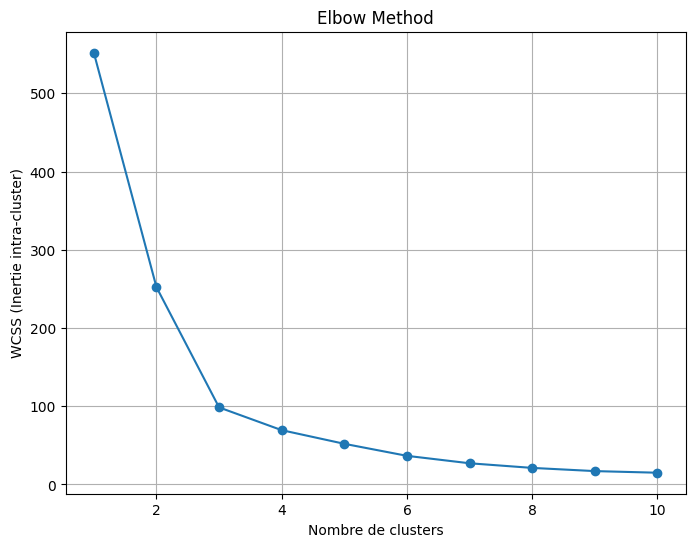

Nombre de clusters optimal sélectionné : 3


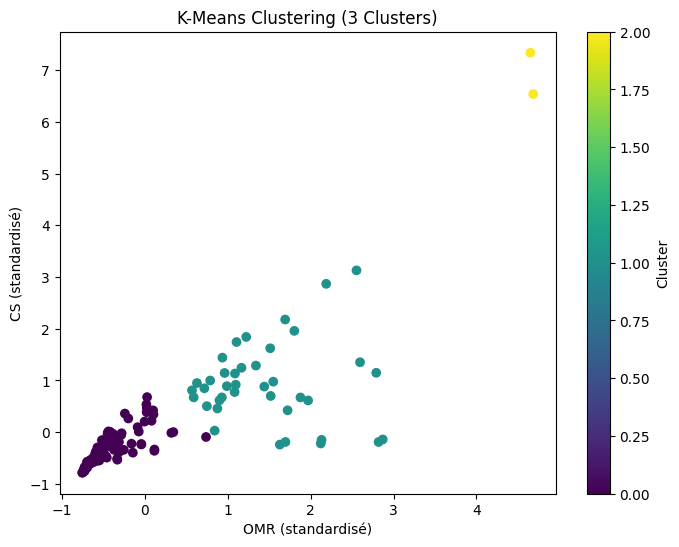

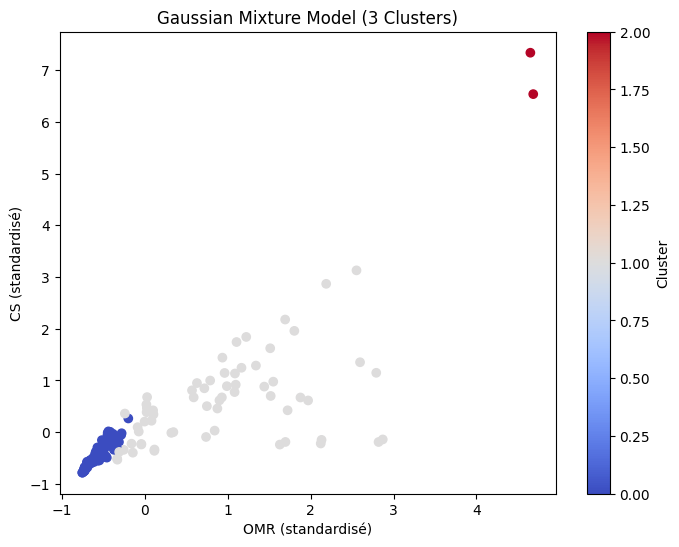

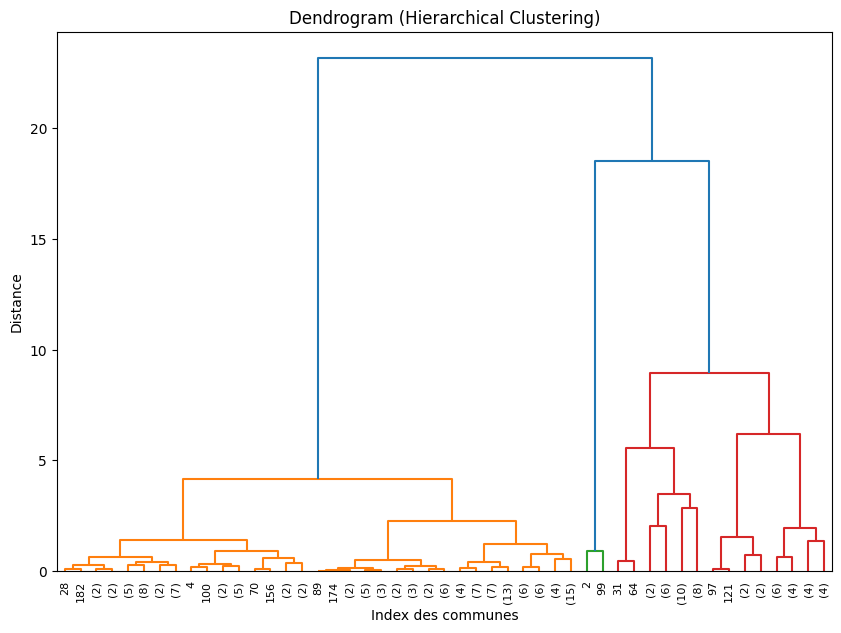

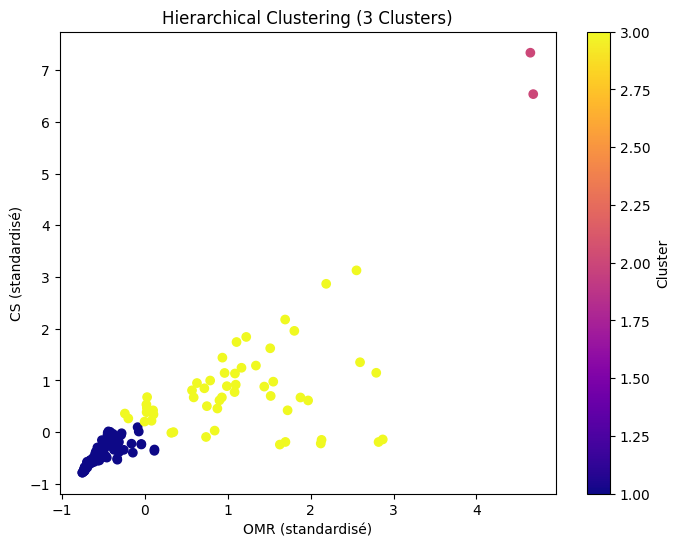


Aperçu des clusters :
                     nom_commune  kmeans_cluster  gmm_cluster  \
0   Marseille 6e  Arrondissement               1            1   
1  Marseille 16e  Arrondissement               0            1   
2                Aix-en-Provence               2            2   
3                        Allauch               0            1   
4                  Berre-l'Étang               0            1   

   hierarchical_cluster  
0                     2  
1                     0  
2                     1  
3                     2  
4                     0  

Données avec clusters sauvegardées sous 'data_sud_clustered.csv'.


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Charger les données nettoyées de Data Sud
data_sud = pd.read_csv(r'Data Sud\data_sud_cleaned.csv')

# Sélectionner les colonnes pertinentes pour le clustering
features = ['omr_en_tonnes', 'cs_en_tonnes', 'verre_seul_en_tonnes']  # Quantités de déchets
clustering_data = data_sud[features].dropna()

# Standardiser les données
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

print("Données standardisées prêtes pour le clustering.")

# ---- Elbow Method pour déterminer le nombre optimal de clusters ----
wcss = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

# Tracer la courbe de l'Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Inertie intra-cluster)')
plt.grid(True)
plt.show()

# Choisir un nombre optimal de clusters basé sur le "coude" (exemple : 3 clusters)
optimal_clusters = 3
print(f"Nombre de clusters optimal sélectionné : {optimal_clusters}")

# ---- K-Means Clustering ----
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(clustering_data_scaled)
data_sud['kmeans_cluster'] = kmeans_labels

# Visualisation des clusters K-Means
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-Means Clustering ({optimal_clusters} Clusters)')
plt.xlabel('OMR (standardisé)')
plt.ylabel('CS (standardisé)')
plt.colorbar(label='Cluster')
plt.show()

# ---- Gaussian Mixture Model (GMM) ----
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(clustering_data_scaled)
data_sud['gmm_cluster'] = gmm_labels

# Visualisation des clusters GMM
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=gmm_labels, cmap='coolwarm')
plt.title(f'Gaussian Mixture Model ({optimal_clusters} Clusters)')
plt.xlabel('OMR (standardisé)')
plt.ylabel('CS (standardisé)')
plt.colorbar(label='Cluster')
plt.show()

# ---- Hierarchical Clustering ----
# Calculer les liens hiérarchiques
linkage_matrix = linkage(clustering_data_scaled, method='ward')

# Dessiner un dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Index des communes')
plt.ylabel('Distance')
plt.show()

# Extraire les clusters hiérarchiques
hierarchical_labels = fcluster(linkage_matrix, t=optimal_clusters, criterion='maxclust')
data_sud['hierarchical_cluster'] = hierarchical_labels - 1  # Ajustement pour commencer à 0

# Visualisation des clusters hiérarchiques
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title(f'Hierarchical Clustering ({optimal_clusters} Clusters)')
plt.xlabel('OMR (standardisé)')
plt.ylabel('CS (standardisé)')
plt.colorbar(label='Cluster')
plt.show()

# ---- Résultats des clusters ----
print("\nAperçu des clusters :")
print(data_sud[['nom_commune', 'kmeans_cluster', 'gmm_cluster', 'hierarchical_cluster']].head())

# Sauvegarder les données enrichies
data_sud.to_csv(r'Data Sud\data_sud_clustered.csv', index=False)
print("\nDonnées avec clusters sauvegardées sous 'data_sud_clustered.csv'.")


Dimensional Réduction DataSud PCA et t-SNE

Données standardisées prêtes pour la réduction de dimensions.
Variance expliquée par PCA : [0.91339234 0.08259041]


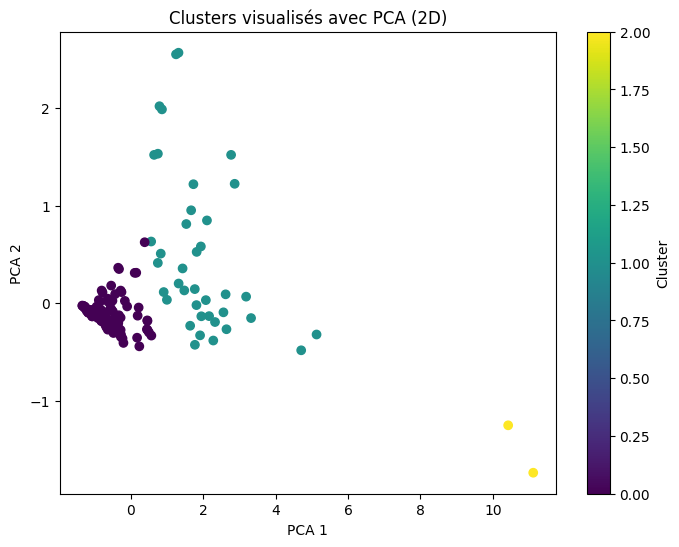

c:\Users\thoma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\thoma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


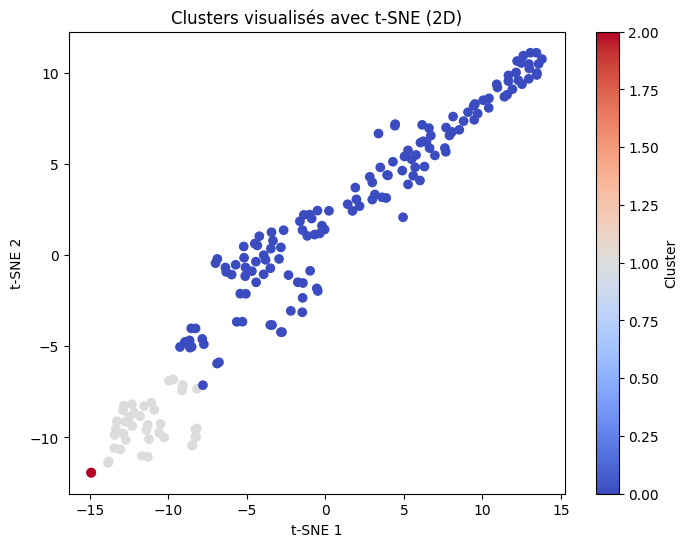


Données avec réduction de dimensions sauvegardées sous 'data_sud_reduced.csv'.


In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Charger les données enrichies avec clusters
data_sud = pd.read_csv(r'Data Sud\data_sud_clustered.csv')

# Sélectionner les colonnes pertinentes pour l'analyse
features = ['omr_en_tonnes', 'cs_en_tonnes', 'verre_seul_en_tonnes']
clustering_data = data_sud[features].dropna()

# Standardiser les données
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

print("Données standardisées prêtes pour la réduction de dimensions.")

# ---- PCA : Réduction à 2 dimensions ----
pca = PCA(n_components=2)
pca_data = pca.fit_transform(clustering_data_scaled)

# Ajouter les composants PCA au dataset
data_sud['PCA_1'] = pca_data[:, 0]
data_sud['PCA_2'] = pca_data[:, 1]

# Variance expliquée par composant
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par PCA : {explained_variance}")

# Visualisation des clusters avec PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data_sud['kmeans_cluster'], cmap='viridis')
plt.title('Clusters visualisés avec PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# ---- t-SNE : Visualisation avancée ----
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(clustering_data_scaled)

# Ajouter les composants t-SNE au dataset
data_sud['tSNE_1'] = tsne_data[:, 0]
data_sud['tSNE_2'] = tsne_data[:, 1]

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=data_sud['kmeans_cluster'], cmap='coolwarm')
plt.title('Clusters visualisés avec t-SNE (2D)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()

# ---- Sauvegarde des résultats ----
data_sud.to_csv(r'Data Sud\data_sud_reduced.csv', index=False)
print("\nDonnées avec réduction de dimensions sauvegardées sous 'data_sud_reduced.csv'.")


Outlier Detection Isolation Forest and OC-SVM

Données standardisées prêtes pour la détection d'anomalies.


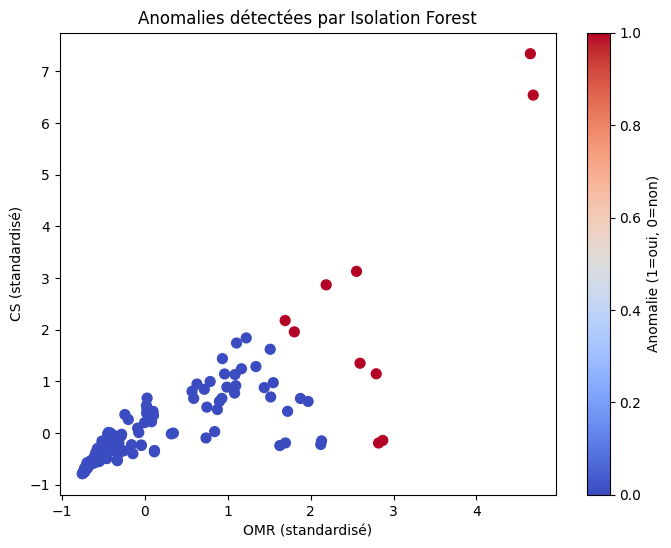

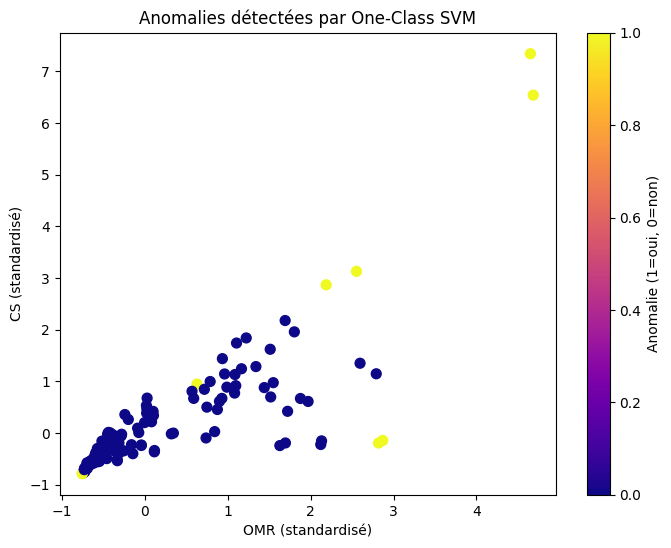


Aperçu des anomalies détectées :
                       nom_commune  omr_en_tonnes  cs_en_tonnes  \
2                  Aix-en-Provence        48152.0        7683.0   
31    Marseille 8e  Arrondissement        26225.0        3462.0   
63    Marseille 7e  Arrondissement        12348.0        1650.0   
64    Marseille 8e  Arrondissement        29480.0        3708.0   
65    Marseille 9e  Arrondissement        21819.0        2810.0   
67   Marseille 13e  Arrondissement        29862.0        2030.0   
89         Saint-Antonin-sur-Bayon           37.0          15.0   
96    Marseille 9e  Arrondissement        22805.0        2603.0   
97   Marseille 15e  Arrondissement        31851.0         573.0   
99                 Aix-en-Provence        48460.0        6927.0   
121  Marseille 15e  Arrondissement        32300.0         620.0   
150  Marseille 13e  Arrondissement        31601.0        1837.0   
174        Saint-Antonin-sur-Bayon           40.0          12.0   

     verre_seul_en_tonnes  

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Charger les données réduites (PCA & t-SNE déjà ajoutées)
data_sud = pd.read_csv(r'Data Sud\data_sud_reduced.csv')

# Sélectionner les colonnes pertinentes pour la détection d'anomalies
features = ['omr_en_tonnes', 'cs_en_tonnes', 'verre_seul_en_tonnes']
anomaly_data = data_sud[features].dropna()

# Standardiser les données
scaler = StandardScaler()
anomaly_data_scaled = scaler.fit_transform(anomaly_data)

print("Données standardisées prêtes pour la détection d'anomalies.")

# ---- Isolation Forest ----
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Contamination = proportion d'anomalies attendues
iso_forest_labels = iso_forest.fit_predict(anomaly_data_scaled)

# Ajouter les résultats de l'Isolation Forest
data_sud['isolation_forest_anomaly'] = (iso_forest_labels == -1).astype(int)  # 1 = anomalie, 0 = normal

# Visualisation des anomalies détectées (Isolation Forest)
plt.figure(figsize=(8, 6))
plt.scatter(anomaly_data_scaled[:, 0], anomaly_data_scaled[:, 1], c=data_sud['isolation_forest_anomaly'], cmap='coolwarm', s=50)
plt.title('Anomalies détectées par Isolation Forest')
plt.xlabel('OMR (standardisé)')
plt.ylabel('CS (standardisé)')
plt.colorbar(label='Anomalie (1=oui, 0=non)')
plt.show()

# ---- One-Class SVM ----
oc_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)  # Nu = proportion de points considérés comme anomalies
oc_svm_labels = oc_svm.fit_predict(anomaly_data_scaled)

# Ajouter les résultats de One-Class SVM
data_sud['ocsvm_anomaly'] = (oc_svm_labels == -1).astype(int)  # 1 = anomalie, 0 = normal

# Visualisation des anomalies détectées (One-Class SVM)
plt.figure(figsize=(8, 6))
plt.scatter(anomaly_data_scaled[:, 0], anomaly_data_scaled[:, 1], c=data_sud['ocsvm_anomaly'], cmap='plasma', s=50)
plt.title('Anomalies détectées par One-Class SVM')
plt.xlabel('OMR (standardisé)')
plt.ylabel('CS (standardisé)')
plt.colorbar(label='Anomalie (1=oui, 0=non)')
plt.show()

# ---- Résultats combinés ----
# Comparer les anomalies détectées par les deux méthodes
data_sud['combined_anomaly'] = data_sud['isolation_forest_anomaly'] | data_sud['ocsvm_anomaly']

print("\nAperçu des anomalies détectées :")
print(data_sud[data_sud['combined_anomaly'] == 1][['nom_commune', 'omr_en_tonnes', 'cs_en_tonnes', 'verre_seul_en_tonnes']])

# Sauvegarder les résultats avec anomalies
data_sud.to_csv(r'Data Sud\data_sud_anomalies.csv', index=False)
print("\nDonnées avec anomalies détectées sauvegardées sous 'data_sud_anomalies.csv'.")


NLP Analyse Processing

In [30]:
import pandas as pd
from gensim.models import Word2Vec
import re

# Charger les données nettoyées
ademe_data = pd.read_csv(r'ADEME\ademe_cleaned.csv')

# Vérifier les colonnes disponibles
print("Colonnes disponibles :")
print(ademe_data.columns)

# ---- Normalisation du texte ----
def normalize_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Remplacer les caractères spéciaux par des espaces
    text = re.sub(r"[&/]", " ", text)
    # Supprimer les caractères non alphanumériques (sauf espaces)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

# Normaliser les sous-catégories
ademe_data['sous_categories_normalized'] = ademe_data['sous_categories'].dropna().apply(normalize_text)

# Préparer les données pour Word2Vec
corpus = ademe_data['sous_categories_normalized'].dropna().str.split().tolist()

# ---- Entraîner Word2Vec ----
word2vec_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# Tester les relations entre les mots
print("\nMots similaires pour 'batteries':")
if 'batteries' in word2vec_model.wv.key_to_index:
    print(word2vec_model.wv.most_similar('vetement'))
else:
    print("Le mot 'batteries' n'est pas dans le modèle Word2Vec.")

# Sauvegarder le modèle Word2Vec
word2vec_model.save(r'ADEME\word2vec_ademe.model')
print("\nModèle Word2Vec sauvegardé sous 'word2vec_ademe.model'.")


C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Colonnes disponibles :
Index(['Nom', 'Nom commercial', 'Description', 'Type d'acteur', 'Site web',
       'Adresse', 'Code postal', 'Ville', 'latitude', 'longitude',
       'Qualités et labels', 'Public accueilli', 'Reprise',
       'Exclusivité de reprise/réparation', 'Uniquement sur RDV',
       'Type de services', 'Propositions de services', 'action',
       'sous_categories'],
      dtype='object')

Mots similaires pour 'batteries':
[('accessoire', 0.27255889773368835), ('vaisselle', 0.25630655884742737), ('console', 0.2516707479953766), ('chaussures', 0.2510456442832947), ('jardin', 0.21629062294960022), ('peintures', 0.20943012833595276), ('lunettes', 0.19698813557624817), ('vehicule', 0.16910989582538605), ('bijou', 0.1688312143087387), ('bateau', 0.16747638583183289)]

Modèle Word2Vec sauvegardé sous 'word2vec_ademe.model'.


In [44]:
from google.cloud import vision
from googletrans import Translator

# Configurer l'authentification avec la clé JSON
client = vision.ImageAnnotatorClient.from_service_account_json('C:/Users/thoma/Desktop/Project/API_Keys/ML-for-de/practical-bebop-447416-s8-fb3d7fbdb629.json')

# Initialiser le traducteur
translator = Translator()

# Fonction pour analyser une image avec Google Vision
def detect_labels(image_path):
    with open(image_path, 'rb') as image_file:
        content = image_file.read()
        image = vision.Image(content=content)

    # Appeler l'API Vision
    response = client.label_detection(image=image)
    labels = response.label_annotations

    # Récupérer les descriptions des labels
    english_labels = [label.description for label in labels]
    return english_labels

# Fonction pour traduire les labels en français
def translate_to_french(labels):
    return [translator.translate(label, src='en', dest='fr').text for label in labels]

# Exemple d'utilisation
image_path = 'image_example/pile.jpg'  # Remplacez par votre image
print("Analyse de l'image...")

# Étape 1 : Détecter les labels en anglais
english_labels = detect_labels(image_path)
print("Labels détectés (en anglais) :", english_labels)

# Étape 2 : Traduire les labels en français
french_labels = translate_to_french(english_labels)
print("Labels traduits (en français) :", french_labels)


Analyse de l'image...
Labels détectés (en anglais) : ['Electric battery', 'Multipurpose Battery']
Labels traduits (en français) : ['Batterie électrique', 'Batterie polyvalente']


In [49]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from google.cloud import vision
from googletrans import Translator
from gensim.models import Word2Vec

# Initialisation
cnn_model = load_model('best_cnn_model.h5')  # Modèle CNN
client = vision.ImageAnnotatorClient.from_service_account_json('C:/Users/thoma/Desktop/Project/API_Keys/ML-for-de/practical-bebop-447416-s8-fb3d7fbdb629.json')  # API Vision
translator = Translator()  # API de traduction
data_sud = pd.read_csv(r'Data Sud\data_sud_anomalies.csv')  # Données régionales
ademe_data = pd.read_csv(r'ADEME\ademe_cleaned.csv')  # Données ADEME
word2vec_model = Word2Vec.load(r'ADEME\word2vec_ademe.model')  # Modèle Word2Vec

# ---- Étape 1 : Classification d'image ----
def classify_image(image_path, model):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Recyclable" if prediction[0][0] > 0.5 else "Organique"

# ---- Étape 2 : Identification via Google Vision ----
def detect_labels_with_translation(image_path):
    # Détection avec Google Vision
    with open(image_path, 'rb') as image_file:
        content = image_file.read()
        image = vision.Image(content=content)
    response = client.label_detection(image=image)
    english_labels = [label.description for label in response.label_annotations]

    # Traduction des labels en français
    french_labels = [translator.translate(label, src='en', dest='fr').text for label in english_labels]
    return french_labels




C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
# ---- Étape 3 : Recommandation via Word2Vec ----
def recommend_services(labels, ademe_data, word2vec_model):
    matched_services = []
    for label in labels:
        if label in word2vec_model.wv.key_to_index:
            similar_words = [word for word, _ in word2vec_model.wv.most_similar(label, topn=5)]
            matched_services.extend(similar_words)
    matched_services = list(set(matched_services))  # Éliminer les doublons
    recommendations = ademe_data[ademe_data['sous_categories'].str.contains('|'.join(matched_services), na=False)]
    if recommendations.empty:
        return "Aucune recommandation trouvée."
    return recommendations[['Nom', 'Type de services', 'Adresse', 'Ville', 'Code postal']]



In [56]:
def get_regional_stats(code_postal, data):
    # Convertir la colonne 'INSEE' en chaîne et supprimer '.0'
    data['insee'] = data['insee'].astype(str).str.replace('.0', '', regex=False)
    
    # Filtrer les données avec le code postal
    regional_data = data[data['insee'] == str(code_postal)]
    if regional_data.empty:
        return "Pas de données pour ce code postal."
    return regional_data[['nom_commune', 'omr_en_tonnes', 'cs_en_tonnes', 'verre_seul_en_tonnes', 'isolation_forest_anomaly']]




In [52]:
# ---- Pipeline final ----
def pipeline(image_path, code_postal):
    print("1. Classification de l'image :")
    image_class = classify_image(image_path, cnn_model)
    print(f"   - L'image est classée comme : {image_class}")
    
    if image_class == "Organique":
        print("\nL'objet est organique, aucune action supplémentaire nécessaire.")
        return
    
    print("\n2. Identification de l'objet via Google Vision :")
    french_labels = detect_labels_with_translation(image_path)
    print(f"   - Labels détectés (traduits en français) : {french_labels}")
    
    print("\n3. Recommandation de services :")
    services = recommend_services(french_labels, ademe_data, word2vec_model)
    print(services)
    
    print("\n4. Statistiques régionales :")
    regional_stats = get_regional_stats(code_postal, data_sud)
    print(regional_stats)



In [58]:
# ---- Exemple d'utilisation ----
image_path = 'image_example/pile.jpg'  # Chemin de l'image
code_postal = 13206  # Exemple de code postal
pipeline(image_path, code_postal)

1. Classification de l'image :
1/1 [==============================] - 0s 28ms/step
   - L'image est classée comme : Recyclable

2. Identification de l'objet via Google Vision :
   - Labels détectés (traduits en français) : ['Batterie électrique', 'Batterie polyvalente']

3. Recommandation de services :
                                                      Nom  \
0                                             Lidl - SOCX   
1                                 L'Atelier Bar A Couture   
2                                        AD VAS PERPIGNAN   
3                 C.C. DU BRIANCONNAIS: Point de collecte   
4                     RENAULT SAVENAY AUTOMOBILES SAVENAY   
...                                                   ...   
313330  COMMUNAUTÉ DE COMMUNES DES VALLÉES DU CLAIN: P...   
313331                                   Les Sens Du Bois   
313332                                           ACTIFRIP   
313333                     Bibliothèque Au Puits Du Livre   
313334                   